Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not. Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [18]:
#load the basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import os
os.getcwd()

'D:\\Great Learning\\PGP-BABI\\Python Programming'

In [21]:
os.chdir("D:\Great Learning\PGP-BABI\Python Programming")
os.getcwd()

'D:\\Great Learning\\PGP-BABI\\Python Programming'

In [22]:
df_price = pd.read_csv("houseprice.csv")
df_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [23]:
df_price.shape

(1460, 81)

### Univariate Analysis

In [24]:
plt.rcParams['figure.figsize']=[10,6]

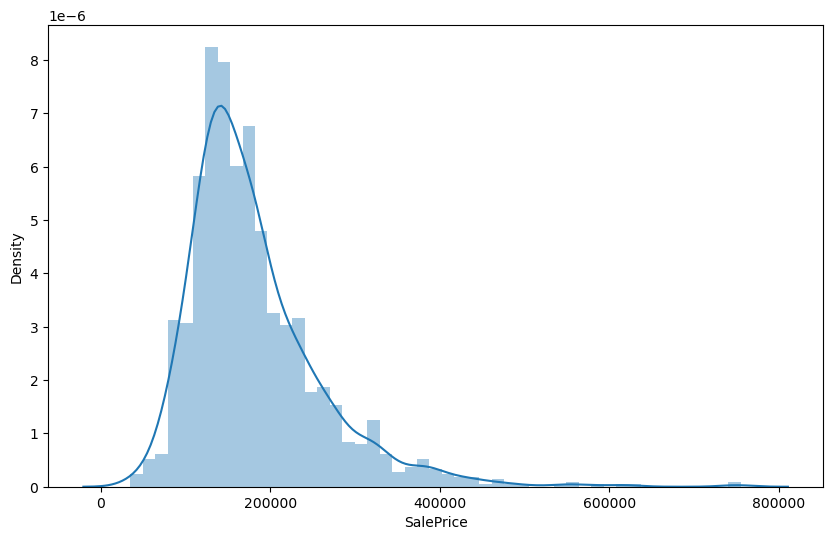

In [25]:
sns.distplot(df_price['SalePrice'])
plt.show()

In [26]:
df_price['SalePrice'].skew()

1.8828757597682129

In [27]:
df_price['SalePrice'].kurtosis()

6.536281860064529

In [28]:
df_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
df_price.drop('Id',axis=1,inplace=True)
df_price.shape

(1460, 80)

In [30]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [31]:
cols=['MSSubClass','OverallQual','OverallCond']

In [32]:
for i in cols:
    df_price[cols]= df_price[cols].astype('object')

In [33]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [34]:
df_price.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [35]:
(df_price.isnull().sum() / df_price.index.size)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [44]:
(df_price.isnull().sum()/(df_price.index.size)* 100) [df_price.isnull().sum()/(df_price.index.size)*100 >0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [43]:
(df_price.isnull().sum()/(df_price.index.size)* 100) [df_price.isnull().sum()/(df_price.index.size)*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [41]:
df_num= df_price.select_dtypes(include=np.number)
df_cat = df_price.select_dtypes(exclude = np.number)

In [42]:
print("numerical data points are", df_num.shape)
print("categorical data points are", df_cat.shape)

numerical data points are (1460, 34)
categorical data points are (1460, 46)


In [45]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [46]:
df_num = df_num.drop("SalePrice",axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [47]:
cols = list(df_num.columns)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

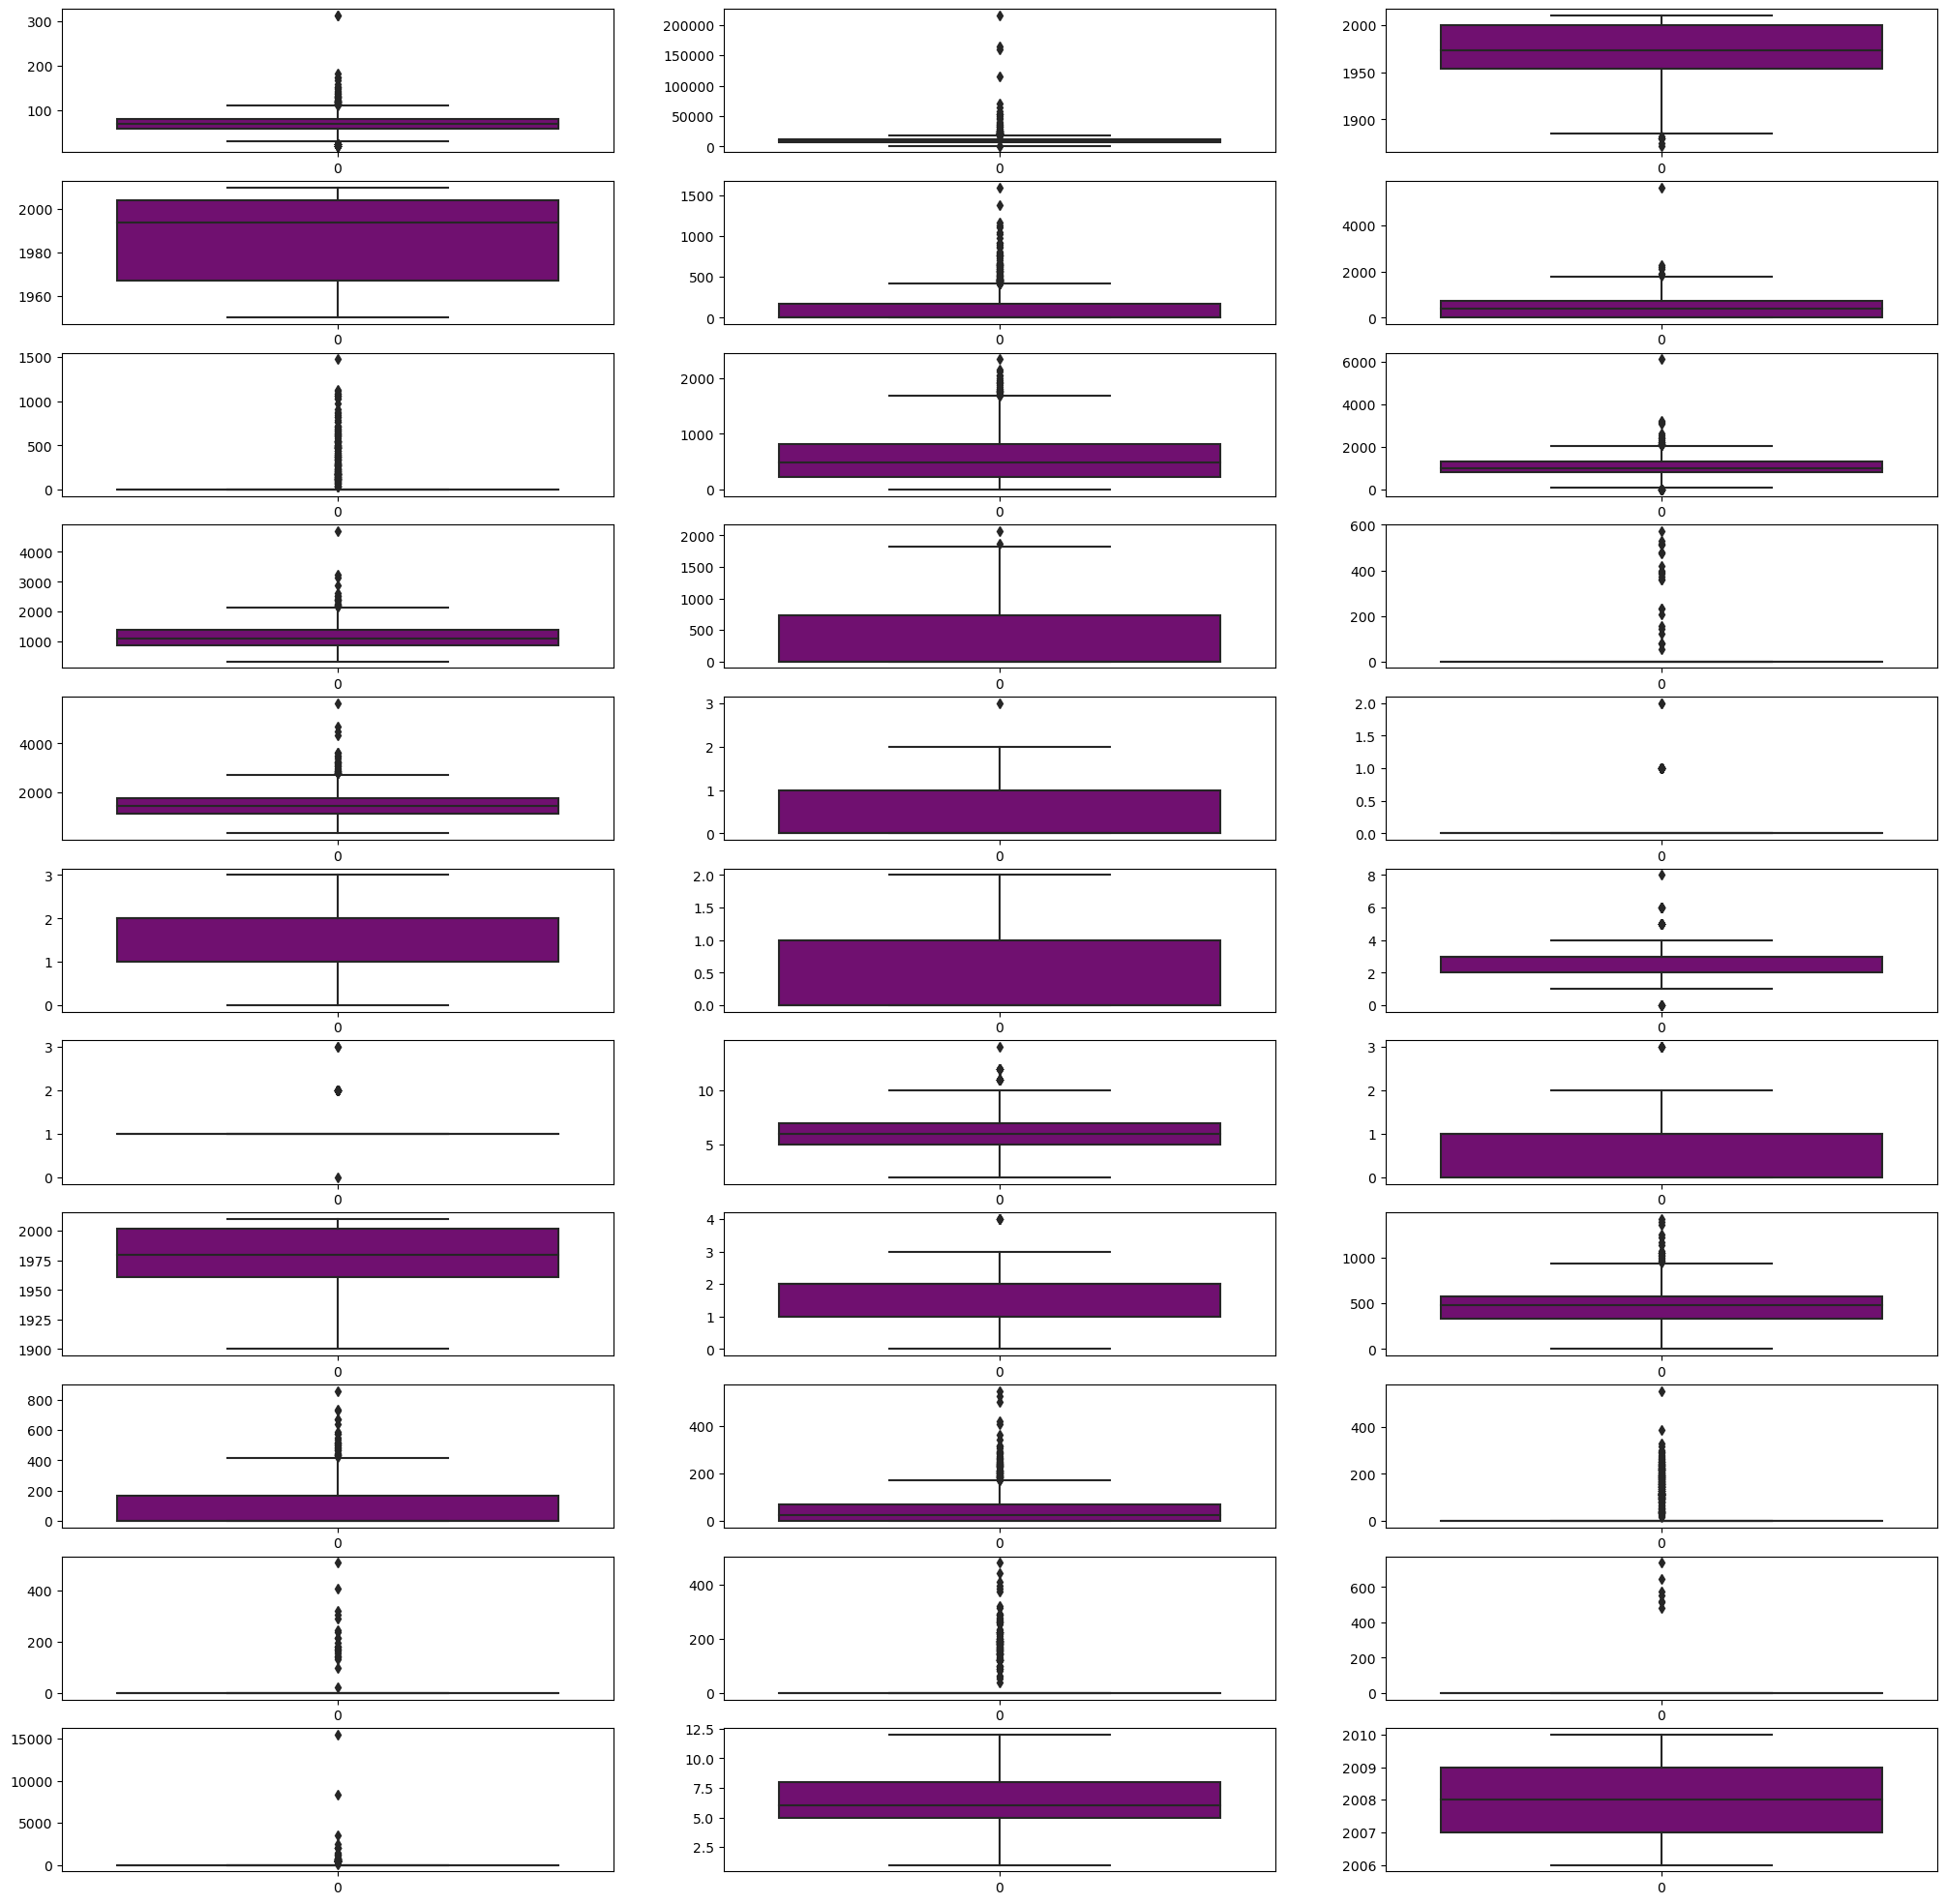

In [51]:
fig,ax = plt.subplots(11,3,figsize=(25,25))

for var,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[var],ax=subplot,color='purple')
    

plt.show()

In [52]:
(df_num.isnull().sum()/(df_num.index.size)* 100) [df_num.isnull().sum()/(df_num.index.size)*100 >0].sort_values(ascending=False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [57]:
# We will inpute the missing values for numerical columns
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5) # this is what we have initialized

df_num_sc = pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)
df_num_sc.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0   8450.0     2003.0        2003.0       196.0       706.0   
1         80.0   9600.0     1976.0        1976.0         0.0       978.0   
2         68.0  11250.0     2001.0        2002.0       162.0       486.0   
3         60.0   9550.0     1915.0        1970.0         0.0       216.0   
4         84.0  14260.0     2000.0        2000.0       350.0       655.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageArea  WoodDeckSF  \
0         0.0      150.0        856.0     856.0  ...       548.0         0.0   
1         0.0      284.0       1262.0    1262.0  ...       460.0       298.0   
2         0.0      434.0        920.0     920.0  ...       608.0         0.0   
3         0.0      540.0        756.0     961.0  ...       642.0         0.0   
4         0.0      490.0       1145.0    1145.0  ...       836.0       192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0            0.0        0.0          0.0       0.0      0.0   
1          0.0            0.0        0.0          0.0       0.0      0.0   
2         42.0            0.0        0.0          0.0       0.0      0.0   
3         35.0          272.0        0.0          0.0       0.0      0.0   
4         84.0            0.0        0.0          0.0       0.0      0.0   

   MoSold  YrSold  
0     2.0  2008.0  
1     5.0  2007.0  
2     9.0  2008.0  
3     2.0  2006.0  
4    12.0  2008.0  

[5 rows x 33 columns]

In [61]:
df_num_sc.isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [64]:
(df_cat.isnull().sum()/(df_cat.index.size)* 100) [df_cat.isnull().sum()/(df_cat.index.size)*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [65]:
df_cat['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

1. Whereever we have missing values or null values, replace with 0
2. Wherever we have data available -replace with 1.
3. 0 means -data is not available and 1 means data is available.
4. By replacing the data , we will create a new column- This is what feature engineering

In [68]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'PoolQC_ava'],
      dtype='object')

In [66]:
df_cat['PoolQC_ava'] = df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [67]:
df_cat['PoolQC_ava'].value_counts()

PoolQC_ava
0    1453
1       7
Name: count, dtype: int64

In [69]:
df_cat['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [70]:
df_cat['MiscFeature_ava'] = df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [71]:
df_cat['MiscFeature_ava'].value_counts()

MiscFeature_ava
0    1406
1      54
Name: count, dtype: int64

In [72]:
df_cat['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [73]:
df_cat['Alley_ava'] = df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [74]:
df_cat['Alley_ava'].value_counts()

Alley_ava
0    1369
1      91
Name: count, dtype: int64

In [75]:
df_cat['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [76]:
df_cat['Fence_ava'] = df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [77]:
df_cat['Fence_ava'].value_counts()

Fence_ava
0    1179
1     281
Name: count, dtype: int64

In [78]:
df_cat['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [ ]:
# df_cat['MasVnrType'].replace('None',np.nan)

In [79]:
df_cat['MasVnrType_ava'] = df_cat['MasVnrType'].replace(np.nan,0).replace('BrkFace',1).replace('GdPrv',1).replace('Stone',1).replace('BrkCmn',1)

In [80]:
df_cat['MasVnrType_ava'].value_counts()

MasVnrType_ava
0    872
1    588
Name: count, dtype: int64

In [81]:
df_cat['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [82]:
df_cat['FireplaceQu_ava'] = df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

In [83]:
df_cat['FireplaceQu_ava'].value_counts()

FireplaceQu_ava
1    770
0    690
Name: count, dtype: int64

In [85]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'PoolQC_ava', 'MiscFeature_ava', 'Alley_ava', 'Fence_ava',
       'MasVnrType_ava', 'FireplaceQu_ava'],
      dtype='object')

In [87]:
(df_cat.isnull().sum()/(df_cat.index.size)* 100) [df_cat.isnull().sum()/(df_cat.index.size)*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [88]:
df_cat.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [89]:
(df_cat.isnull().sum()/(df_cat.index.size)* 100) [df_cat.isnull().sum()/(df_cat.index.size)*100 >0].sort_values(ascending=False)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

In [90]:
# impute the missing values with simple imputer function

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imputer.fit(df_cat.iloc[:,:])

SimpleImputer(strategy='most_frequent')

In [91]:
df_cat_trans = imputer.transform(df_cat)

In [92]:
df_cat_trans

array([[60, 'RL', 'Pave', ..., 0, 1, 0],
       [20, 'RL', 'Pave', ..., 0, 0, 1],
       [60, 'RL', 'Pave', ..., 0, 1, 1],
       ...,
       [70, 'RL', 'Pave', ..., 1, 0, 1],
       [20, 'RL', 'Pave', ..., 0, 0, 0],
       [20, 'RL', 'Pave', ..., 0, 0, 0]], dtype=object)

In [93]:
df_cat = pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [94]:
df_cat.isnull().sum()

MSSubClass         0
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
PoolQC_ava         0
MiscFeature_ava    0
Alley_ava          0
Fence_ava          0
MasVnrType_ava     0
FireplaceQu_ava    0
dtype: int64

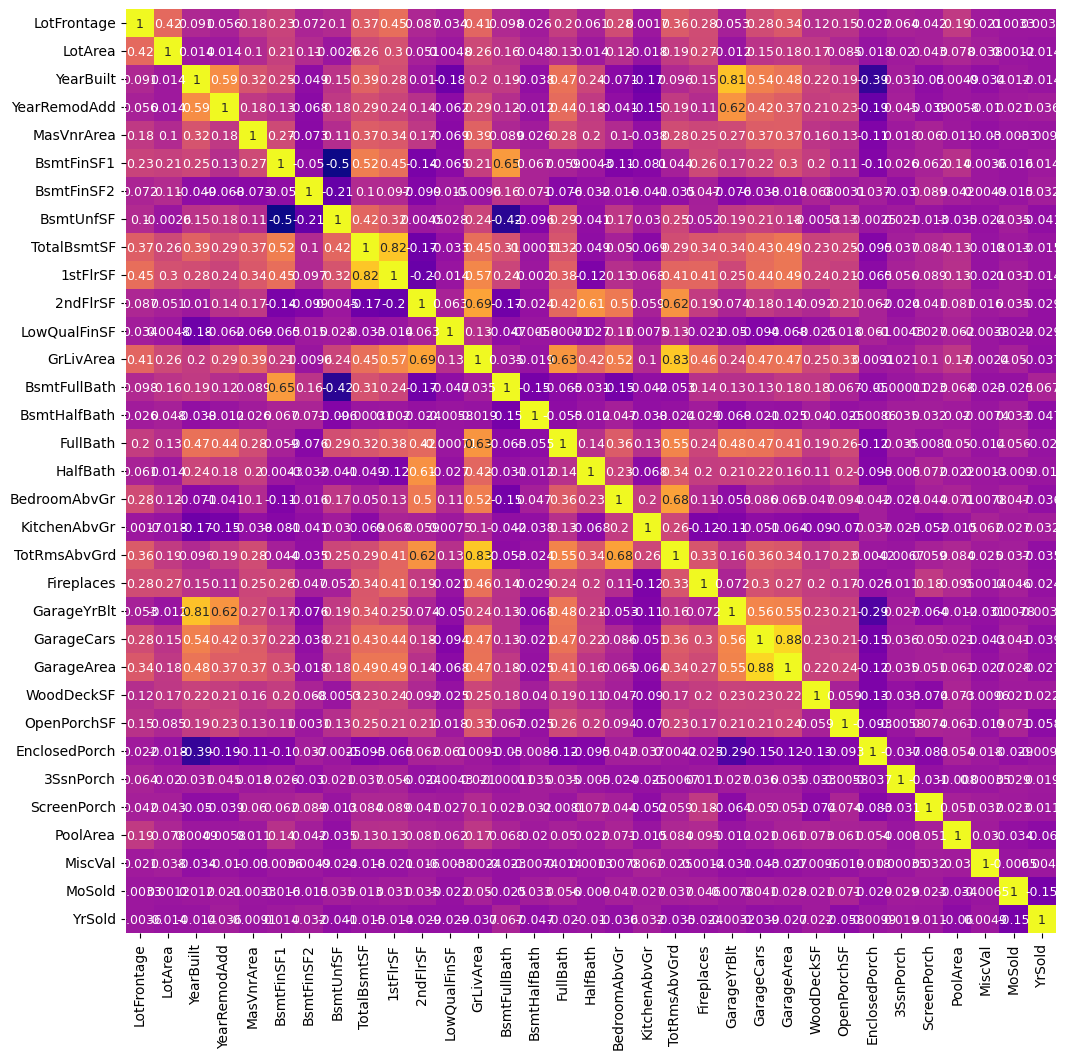

In [100]:
# correlation between the variables

plt.rcParams['figure.figsize']=[12,12]
sns.heatmap(df_num_sc.corr(),
            cmap='plasma',
            annot=True,
            cbar=False,
            annot_kws={'size':9})

plt.show()

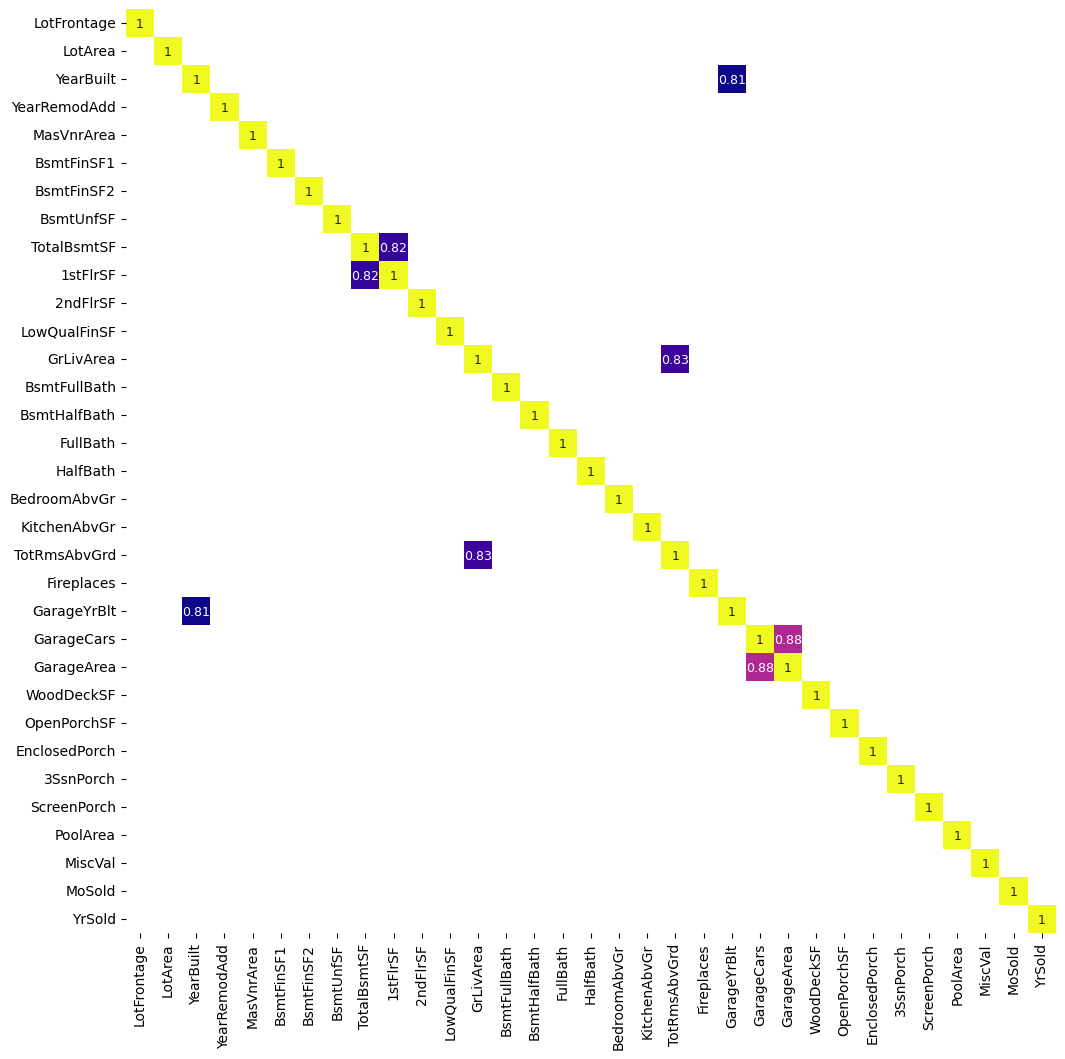

In [101]:
# correlation between the variables

plt.rcParams['figure.figsize']=[12,12]
sns.heatmap(df_num_sc.corr()[(df_num_sc.corr()>=0.75) | (df_num_sc.corr()<=-0.75)],
            cmap='plasma',
            annot=True,
            cbar=False,
            annot_kws={'size':9})

plt.show()

## AUTO EDA

In [102]:
pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [103]:
import sweetviz as sv

report1_num = sv.analyze(df_num_sc)

report1_num.show_html('report1_num.html')

                                             |                                             | [  0%]   00:00 ->…

Report report1_num.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Auto Visualization

In [104]:
pip install AutoViz

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [105]:
df_num_sc.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [106]:
df_num_red = df_num_sc[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']]

In [107]:
df_num_red.to_csv('HousePrice_num_viz.csv')

In [108]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.731. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [109]:
AV.AutoViz('HousePrice_num_viz.csv')

Shape of your Data Set loaded: (1460, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    16 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix data quality issues automatically, import FixDQ from autoviz...


Number of All Scatter Plots = 120
All Plots done
Time to run AutoViz = 37 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Unnamed: 0  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0           0        65.0       8450.0   2003.0       2003.0        196.0     
1           1        80.0       9600.0   1976.0       1976.0          0.0     
2           2        68.0      11250.0   2001.0       2002.0        162.0     
3           3        60.0       9550.0   1915.0       1970.0          0.0     
4           4        84.0      14260.0   2000.0       2000.0        350.0     
...          ...          ...      ...        ...           ...         ...   
1455     1455        62.0       7917.0   1999.0       2000.0          0.0     
1456     1456        85.0      13175.0   1978.0       1988.0        119.0     
1457     1457        66.0       9042.0   1941.0       2006.0          0.0     
1458     1458        68.0       9717.0   1950.0       1996.0          0.0     
1459     1459        75.0       9937.0   1965.0       1965.0          0.0     

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0        706.0         0.0      150.0       856.0       856.0     854.0    
1        978.0         0.0      284.0      1262.0      1262.0       0.0    
2        486.0         0.0      434.0       920.0       920.0     866.0    
3        216.0         0.0      540.0       756.0       961.0     756.0    
4        655.0         0.0      490.0      1145.0      1145.0    1053.0    
...          ...         ...        ...          ...       ...       ...   
1455       0.0         0.0      953.0       953.0       953.0     694.0    
1456     790.0       163.0      589.0      1542.0      2073.0       0.0    
1457     275.0         0.0      877.0      1152.0      1188.0    1152.0    
1458      49.0      1029.0        0.0      1078.0      1078.0       0.0    
1459     830.0       290.0      136.0      1256.0      1256.0       0.0    

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  
0          0.0       1710.0         1.0           0.0      
1          0.0       1262.0         0.0           1.0      
2          0.0       1786.0         1.0           0.0      
3          0.0       1717.0         1.0           0.0      
4          0.0       2198.0         1.0           0.0      
...            ...        ...           ...           ...  
1455       0.0       1647.0         0.0           0.0      
1456       0.0       2073.0         1.0           0.0      
1457       0.0       2340.0         0.0           0.0      
1458       0.0       1078.0         1.0           0.0      
1459       0.0       1256.0         1.0           0.0      

[1460 rows x 16 columns]

##  Encoding Techniques

In [110]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [112]:
import category_encoders as ce

In [113]:
import category_encoders as ce
import pandas as pd


sample_dt = pd.DataFrame({
                      'Salary': ["Low", "Moderate", "Moderate", "High", "Low",
                                 "Moderate", "Moderate", "Moderate", "Low", "Low",
                                 "Low", "High", "Low", "Moderate", "Moderate"

                                 ],

                       'CIBIL':  [250, 650, 680, 800, 275,
                                 680, 675, 680, 200, 275,
                                 300, 820, 300, 690, 720
                                 ],

                      'Premium': [6250, 2231, 23456, 15000, 5600,
                                   5600, 7000, 4560, 8900, 9000,
                                   7688, 5600, 4580, 8900, 7800
                                 ],
                          })

In [114]:
sample_dt

Salary   CIBIL  Premium
0        Low   250     6250 
1   Moderate   650     2231 
2   Moderate   680    23456 
3       High   800    15000 
4        Low   275     5600 
5   Moderate   680     5600 
6   Moderate   675     7000 
7   Moderate   680     4560 
8        Low   200     8900 
9        Low   275     9000 
10       Low   300     7688 
11      High   820     5600 
12       Low   300     4580 
13  Moderate   690     8900 
14  Moderate   720     7800

In [115]:
x_sample = sample_dt.drop('Premium', axis=1)
y_sample =sample_dt['Premium']


In [117]:
sample_encode = ce.cat_boost.CatBoostEncoder()
sample_encode.fit(x_sample,y_sample)

sample_output = sample_encode.transform(x_sample)
sample_output

Salary     CIBIL
0   7166.047619   250 
1   8461.416667   650 
2   8461.416667   680 
3   9581.444444   800 
4   7166.047619   275 
5   8461.416667   680 
6   8461.416667   675 
7   8461.416667   680 
8   7166.047619   200 
9   7166.047619   275 
10  7166.047619   300 
11  9581.444444   820 
12  7166.047619   300 
13  8461.416667   690 
14  8461.416667   720

In [119]:

# Transfomration of the Y variable

df_target = np.log(df_price['SalePrice'])

In [120]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [121]:
def cat_boost(cat_input,target):
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encode = round(catboost.transform(cat_input),2)
    return df_encode
    

In [122]:
df_cat_en = cat_boost(df_cat,df_target)
df_cat_en.head()

MSSubClass  MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0     12.34      12.09    12.03    11.94      12.02       12.02      12.00     
1     12.05      12.09    12.03    11.94      12.02       12.02      12.03     
2     12.34      12.09    12.03    12.16      12.02       12.02      12.00     
3     11.97      12.09    12.03    12.16      12.02       12.02      12.03     
4     12.34      12.09    12.03    12.16      12.02       12.02      12.03     

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0    12.02        12.16        12.04       12.03      12.05      12.18     
1    12.02        12.32        11.82       12.03      12.05      11.99     
2    12.02        12.16        12.04       12.03      12.05      12.18     
3    12.02        12.20        12.04       12.03      12.05      12.18     
4    12.02        12.66        12.04       12.03      12.05      12.18     

   OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0     12.22        12.14       11.98      12.02      12.21        12.21      
1     11.97        11.91       11.98      12.02      11.86        11.86      
2     12.22        12.14       11.98      12.02      12.21        12.21      
3     12.22        12.14       11.98      12.02      11.84        11.90      
4     12.49        12.14       11.98      12.02      12.21        12.21      

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0    12.31      12.04       12.26      12.18     12.03       11.94      
1    11.84      12.04       11.87      12.18     12.03       12.36      
2    12.31      12.04       12.26      12.18     12.03       12.09      
3    11.84      12.04       11.72      11.80     12.22       11.94      
4    12.31      12.04       12.26      12.18     12.03       12.16      

   BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  \
0      12.30         12.03      12.03     12.21       12.06       12.06     
1      11.95         12.03      12.03     12.21       12.06       12.06     
2      12.30         12.03      12.03     12.21       12.06       12.06     
3      11.95         12.03      12.03     11.91       12.06       12.06     
4      12.30         12.03      12.03     12.21       12.06       12.06     

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0     12.22        12.04       12.10        12.17        12.03       12.04     
1     11.81        12.04       12.10        12.17        12.03       12.04     
2     12.22        12.04       12.10        12.17        12.03       12.04     
3     12.22        12.04       11.77        11.78        12.03       12.04     
4     12.22        12.04       12.10        12.17        12.03       12.04     

   PavedDrive  SaleType  SaleCondition  PoolQC_ava  MiscFeature_ava  \
0     12.06      11.99       12.01         12.02         12.03        
1     12.06      11.99       12.01         12.02         12.03        
2     12.06      11.99       12.01         12.02         12.03        
3     12.06      11.99       11.79         12.02         12.03        
4     12.06      11.99       12.01         12.02         12.03        

   Alley_ava  Fence_ava  MasVnrType_ava  FireplaceQu_ava  
0    12.04      12.06         12.21           11.81       
1    12.04      12.06         11.90           12.22       
2    12.04      12.06         12.21           12.22       
3    12.04      12.06         11.90           12.22       
4    12.04      12.06         12.21           12.22

In [123]:
df_priceDataset = pd.concat([df_num_sc,df_cat_en],axis=1)
df_priceDataset.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     65.0       8450.0   2003.0       2003.0        196.0       706.0     
1     80.0       9600.0   1976.0       1976.0          0.0       978.0     
2     68.0      11250.0   2001.0       2002.0        162.0       486.0     
3     60.0       9550.0   1915.0       1970.0          0.0       216.0     
4     84.0      14260.0   2000.0       2000.0        350.0       655.0     

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0      0.0       150.0       856.0       856.0     854.0        0.0       
1      0.0       284.0      1262.0      1262.0       0.0        0.0       
2      0.0       434.0       920.0       920.0     866.0        0.0       
3      0.0       540.0       756.0       961.0     756.0        0.0       
4      0.0       490.0      1145.0      1145.0    1053.0        0.0       

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1710.0         1.0           0.0         2.0       1.0         3.0       
1   1262.0         0.0           1.0         2.0       0.0         3.0       
2   1786.0         1.0           0.0         2.0       1.0         3.0       
3   1717.0         1.0           0.0         1.0       0.0         3.0       
4   2198.0         1.0           0.0         2.0       1.0         4.0       

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0       1.0           8.0          0.0       2003.0         2.0      
1       1.0           6.0          1.0       1976.0         2.0      
2       1.0           6.0          1.0       2001.0         2.0      
3       1.0           7.0          1.0       1998.0         3.0      
4       1.0           9.0          1.0       2000.0         3.0      

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0     548.0         0.0       61.0            0.0         0.0         0.0       
1     460.0       298.0        0.0            0.0         0.0         0.0       
2     608.0         0.0       42.0            0.0         0.0         0.0       
3     642.0         0.0       35.0          272.0         0.0         0.0       
4     836.0       192.0       84.0            0.0         0.0         0.0       

   PoolArea  MiscVal  MoSold  YrSold  MSSubClass  MSZoning  Street  LotShape  \
0     0.0      0.0      2.0   2008.0     12.34      12.09    12.03    11.94    
1     0.0      0.0      5.0   2007.0     12.05      12.09    12.03    11.94    
2     0.0      0.0      9.0   2008.0     12.34      12.09    12.03    12.16    
3     0.0      0.0      2.0   2006.0     11.97      12.09    12.03    12.16    
4     0.0      0.0     12.0   2008.0     12.34      12.09    12.03    12.16    

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     12.02       12.02      12.00      12.02        12.16        12.04     
1     12.02       12.02      12.03      12.02        12.32        11.82     
2     12.02       12.02      12.00      12.02        12.16        12.04     
3     12.02       12.02      12.03      12.02        12.20        12.04     
4     12.02       12.02      12.03      12.02        12.66        12.04     

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
0     12.03      12.05      12.18       12.22        12.14       11.98     
1     12.03      12.05      11.99       11.97        11.91       11.98     
2     12.03      12.05      12.18       12.22        12.14       11.98     
3     12.03      12.05      12.18       12.22        12.14       11.98     
4     12.03      12.05      12.18       12.49        12.14       11.98     

   RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  \
0    12.02      12.21        12.21       12.31      12.04       12.26     
1    12.02      11.86        11.86       11.84      12.04       11.87     
2    12.02      12.21        12.21       12.31      12.04       12.26     
3    12.02      1

In [124]:
df_priceDataset.shape

(1460, 79)

In [125]:
#Build the Basic Model

X = df_priceDataset
y = df_target

In [126]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,
                                             y,
                                             test_size=0.30,
                                             random_state = 0)

In [129]:
print("X Train", Xtrain.shape)
print("X Test", Xtest.shape)
print("y Train", ytrain.shape)
print("y test", ytest.shape)


X Train (1022, 79)
X Test (438, 79)
y Train (1022,)
y test (438,)


In [130]:
# Basic model - Linear Regression - SKLearn Method

lr = LinearRegression()
model_lr = lr.fit(Xtrain,ytrain)

pred_train = model_lr.predict(Xtrain)
pred_test = model_lr.predict(Xtest)

In [131]:
r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)

print("R2 Train Score",r2_train)
print("R2 Test Score", r2_test)

R2 Train Score 0.9145563098428305
R2 Test Score 0.8430978175117733


In [132]:
# RMSE 
print("RMSE train", np.sqrt(mean_squared_error(ytrain,pred_train)))
print("RMSE test", np.sqrt(mean_squared_error(ytest,pred_test)))

RMSE train 0.1174919184815347
RMSE test 0.15570206897245895


In [133]:
# Lets build the stats model for linear regression

import statsmodels.api as sma

temp_x = sma.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.30,
                                                 random_state=0)



In [134]:
model = sma.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     133.1
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:39:48   Log-Likelihood:                 738.34
No. Observations:                1022   AIC:                            -1323.
Df Residuals:                     945   BIC:                            -943.1
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LotFrontage         0.0004      0.000      1.787      0.074   -4.15e-05       0.001
LotArea          1.384e-06   4.93e-07      2.808      0.005    4.17e-07    2.35e-06
YearBuilt          -0.0009      0.000     -2.264      0.024      -0.002      -0.000
YearRemodAdd        0.0016      0.000      5.274      0.000       0.001       0.002
MasVnrArea      -1.745e-05   3.28e-05     -0.533      0.594   -8.18e-05    4.69e-05
BsmtFinSF1       4.925e-05    1.2e-05      4.107      0.000    2.57e-05    7.28e-05
BsmtFinSF2       3.783e-05   2.12e-05      1.784      0.075   -3.78e-06    7.94e-05
BsmtUnfSF       -9.939e-06   1.12e-05     -0.888      0.375   -3.19e-05     1.2e-05
TotalBsmtSF      7.714e-05   1.53e-05      5.027      0.000     4.7e-05       0.000
1stFlrSF         5.271e-05   2.77e-05      1.900      0.058   -1.73e-06       0.000
2ndFlrSF         3.026e-05   2.61e-05      1.158      0.247    -2.1e-05    8.15e-05
LowQualFinSF     5.341e-05   6.78e-05      0.787      0.431   -7.97e-05       0.000
GrLivArea           0.0001   2.64e-05      5.160      0.000    8.45e-05       0.000
BsmtFullBath        0.0295      0.012      2.519      0.012       0.007       0.052
BsmtHalfBath        0.0153      0.018      0.827      0.408      -0.021       0.051
FullBath            0.0224      0.013      1.760      0.079      -0.003       0.047
HalfBath            0.0370      0.012      3.022      0.003       0.013       0.061
BedroomAbvGr        0.0182      0.008      2.308      0.021       0.003       0.034
KitchenAbvGr       -0.0479      0.026     -1.839      0.066      -0.099       0.003
TotRmsAbvGrd        0.0074      0.005      1.367      0.172      -0.003       0.018
Fireplaces          0.0349      0.016      2.247      0.025       0.004       0.065
GarageYrBlt        -0.0009      0.000     -2.557      0.011      -0.002      -0.000
GarageCars          0.0119      0.013      0.883      0.378      -0.015       0.038
GarageArea          0.0002   4.62e-05      3.361      0.001    6.47e-05       0.000
WoodDeckSF          0.0001   3.45e-05      2.987      0.003    3.53e-05       0.000
OpenPorchSF      1.522e-05   6.45e-05      0.236      0.814      -0.000       0.000
EnclosedPorch    2.267e-05   7.11e-05      0.319      0.750      -0.000       0.000
3SsnPorch           0.0002      0.000      1.349      0.178   -8.41e-05       0.000
ScreenPorch         0.0002   7.44e-05      3.157      0.002    8.89e-05       0.000
PoolArea            0.0024      0.001      2.978      0.003       0.001       0.004
MiscVal          1.522e-06    7.6e-06      0.200      0.841   -1.34e-05    1.64e-05
MoSold             -0.0016      0.001     -1.096      0.274      -0.005       0.001
YrSold             -0.0039      0.003     -1.255      0.210      -0.010       0.002
MSSubClass          0.0799      0.031      2.551      0.011

## Clustering

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_num_standarized = pd.DataFrame(sc.fit_transform(df_num_sc),columns=df_num_sc.columns)
df_num_standarized.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  -0.250384   -0.207142  1.050994     0.878668     0.506062    0.575425    
1   0.381302   -0.091886  0.156734    -0.429577    -0.575300    1.171992    
2  -0.124047    0.073480  0.984752     0.830215     0.318479    0.092907    
3  -0.460946   -0.096897 -1.863632    -0.720298    -0.575300   -0.499274    
4   0.549751    0.375148  0.951632     0.733308     1.355703    0.463568    

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  -0.288653  -0.944591   -0.459303   -0.793434  1.161852   -0.120242     
1  -0.288653  -0.641228    0.466465    0.257140 -0.795163   -0.120242     
2  -0.288653  -0.301643   -0.313369   -0.627826  1.189351   -0.120242     
3  -0.288653  -0.061670   -0.687324   -0.521734  0.937276   -0.120242     
4  -0.288653  -0.174865    0.199680   -0.045611  1.617877   -0.120242     

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0  0.370333     1.107810     -0.241061    0.789741  1.227585    0.163779     
1 -0.482512    -0.819964      3.948809    0.789741 -0.761621    0.163779     
2  0.515013     1.107810     -0.241061    0.789741  1.227585    0.163779     
3  0.383659     1.107810     -0.241061   -1.026041 -0.761621    0.163779     
4  1.299326     1.107810     -0.241061    0.789741  1.227585    1.390023     

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0   -0.211454      0.912210    -0.951226    1.033810     0.311725    
1   -0.211454     -0.318683     0.600495   -0.065282     0.311725    
2   -0.211454     -0.318683     0.600495    0.952396     0.311725    
3   -0.211454      0.296763     0.600495    0.830275     1.650307    
4   -0.211454      1.527656     0.600495    0.911689     1.650307    

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0   0.351000   -0.752176    0.216503     -0.359325    -0.116339   -0.270208     
1  -0.060731    1.626195   -0.704483     -0.359325    -0.116339   -0.270208     
2   0.631726   -0.752176   -0.070361     -0.359325    -0.116339   -0.270208     
3   0.790804   -0.752176   -0.176048      4.092524    -0.116339   -0.270208     
4   1.698485    0.780197    0.563760     -0.359325    -0.116339   -0.270208     

   PoolArea   MiscVal   MoSold    YrSold   
0 -0.068692 -0.087688 -1.599111  0.138777  
1 -0.068692 -0.087688 -0.489110 -0.614439  
2 -0.068692 -0.087688  0.990891  0.138777  
3 -0.068692 -0.087688 -1.599111 -1.367655  
4 -0.068692 -0.087688  2.100892  0.138777

## Clustering Technique - KMeans

In [142]:
from sklearn.cluster import KMeans

cluster_range = range(1,11)

cluster_errors=[]


for num_clusters  in cluster_range:
    clusters = KMeans(num_clusters,n_init=15,random_state=2)
    
    clusters.fit(df_num_standarized)
    labels = clusters.labels_
    centriods = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})


clusters_df



num_clusters  cluster_errors
0        1        48180.000000 
1        2        41888.451350 
2        3        39364.468962 
3        4        37780.633277 
4        5        36163.639003 
5        6        34946.704001 
6        7        33883.462211 
7        8        32522.776187 
8        9        31572.153292 
9       10        30262.102939